# **Ananya Gupta**

## **DATA SCIENCE & BUSINESS ANALYTICS INTERN AT THE SPARKS FOUNDATION**

### DATASET: matches.csv (https://bit.ly/34SRn3b ) 

## **EXPLORATORY DATA ANALYSIS - SPORTS**

 

### **Loading Packages**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

### **Reading the csv file to Pandas Dataframe**

In [68]:
df = pd.read_csv('matches.csv')

###  **Print the first 5 rows**

In [69]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### **Full Summary of the Dataframe**

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

### **Statistical details of the Dataset**

In [71]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


### **Observations:**

**The following inferences can be made from the describe() method:**

The .csv file has data of IPL matches starting from the season 2008 to 2019.

The biggest margin of victory for the team batting first(win_by_runs) is 146 runs.

The biggest victory of the team batting second(win_by_wickets) is by 10 wickets.

75% of the victorious teams that bat first won by a margin of 19 runs.

75% of the victorious teams that bat second won by a margin of 6 wickets.

There were 756 IPL matches hosted from 2008 to 2019.

### **Shape of the Dataset**

In [72]:
df.shape

(756, 18)

**So there are 756 rows and 18 columns. 756 rows imply that there were 756 IPL matches held between 2008 and 2019.**

### **Finding all the column names inside the Dataset**

In [73]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

**The dataset has 18 columns. Let’s get acquainted with the columns.**

**id:** The IPL match id.

**season:** The IPL season

**city:** The city where the IPL match was held.

**date:** The date on which the match was held.

**team1:**One of the teams of the IPL match

**team2:** The other team of the IPL match

**toss_winner:** The team that won the toss

**toss_decision**: The decision taken by the team that won the toss to ‘bat’ or ‘field’

**result:** The result(‘normal’, ‘tie’, ‘no result’) of the match.

**dl_applied:** (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.

**winner:** The winner of the match.

**win_by_runs:** Provides the runs by which the team batting first won

**win_by_runs:** Provides the number of wickets by which the team batting second won.

**player_of_match:** The outstanding player of the match.

**venue:** The venue where the match was hosted.

**umpire1:** One of the two on-field umpires who officiate the match.

**umpire2:** One of the two on-field umpires who officiate the match.

**umpire3**: The off-field umpire who officiates the match

In [74]:
df.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

### **It’s imperative to know the count of NaN values for each column before we proceed further.**

In [75]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

### **The column ‘umpire3’ has a significant number of NaN values. As the off-field umpire parameter is insignificant, we can drop this column. The other columns that have Nan values are of type object(Pandas equivalent of Python String data type) and are very few in number(<=7).**

In [76]:
df=df.drop(columns=['umpire3'], axis=1)

In [77]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


### **Total Number of Matches in the Dataset**

In [24]:
df['id'].max()

11415

### **Seasons in the Dataset**

In [12]:
df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [14]:
df['season'].nunique()

12

### **Team Won by Maximum Runs**

In [25]:
df.iloc[df['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

 **Details about the match which was won by 'Mumbai Indians' by maximum runs:**

In [15]:
df.iloc[df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

### **Team Won by Maximum Wickets**

In [38]:
df.iloc[df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

### **Team Won by Minimum Runs**

In [40]:
df.iloc[df['win_by_runs'].idxmin()]['winner']

'Rising Pune Supergiant'

### **Team Won by Minimum Wickets**



In [78]:
df.iloc[df['win_by_wickets'].idxmin()]['winner']

'Sunrisers Hyderabad'

### **Which umpire has officiated the most number of IPL matches on-field?**

In [159]:
umpire1 = df['umpire1'].value_counts()
umpire2 = df['umpire2'].value_counts()

In [160]:
umpires_df = pd.concat([umpire1, umpire2], axis=1)
umpires_df

,umpire1,umpire2
HDPK Dharmasena,73.0,14.0
Asad Rauf,51.0,NaN
S Ravi,49.0,57.0
AK Chaudhary,43.0,15.0
Aleem Dar,38.0,NaN
...,...,...
K Srinivasan,NaN,3.0
KN Anantapadmanabhan,NaN,3.0
SD Ranade,NaN,2.0
Nand Kishore,NaN,1.0


In [162]:
umpire = umpires_df.sum(axis=1)

umpire_df = pd.DataFrame(columns=["umpire", "matches"])

for items in umpire.iteritems():
    temp_df = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpire_df= umpire_df.append(temp_df)

In [163]:
umpire_df.sort_values('matches', ascending=False).head()

,umpire,matches
0,S Ravi,106.0
0,HDPK Dharmasena,87.0
0,C Shamshuddin,73.0
0,AK Chaudhary,58.0
0,SJA Taufel,55.0


### **S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field, followed by former Sri Lankan international cricketer HDPK Dharmasena.**

# **Exploratory Analysis and Visualization**
### **Now that our data set has been cleaned up, it’s time to do the in-depth analysis and visualization.**

### **The Season which had most number of matches played.**

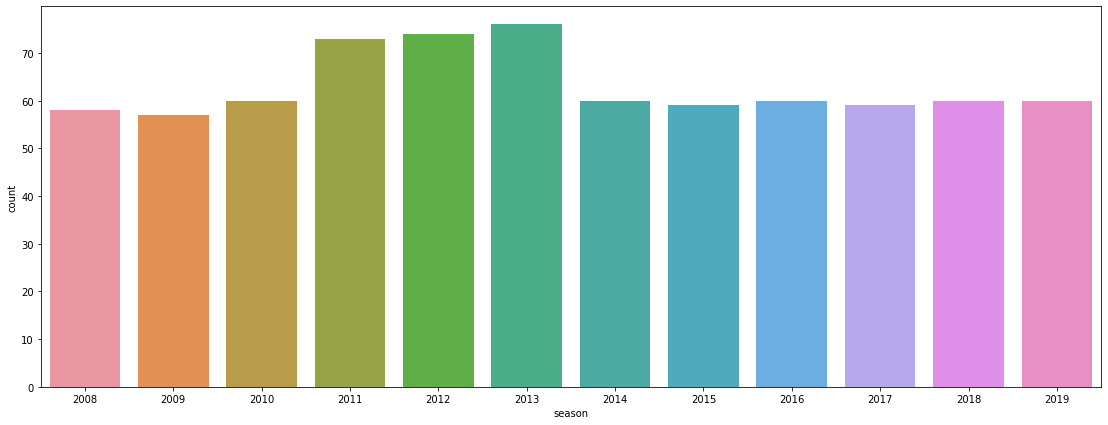

In [153]:
plt.figure(figsize=(19,7))
sns.countplot(x='season', data=df)
plt.show()

**Maximum number of matches were played in '2013'.**

# **The team with the most number of wins per season.**

**Let’s analyze the team with the most wins in each season.**

In [148]:
teams_per_season = df.groupby('season')['winner'].value_counts()
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1  
        

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


### **The number of wins is a discrete value. Hence, we will plot a bar chart(barplot in Seaborn).**

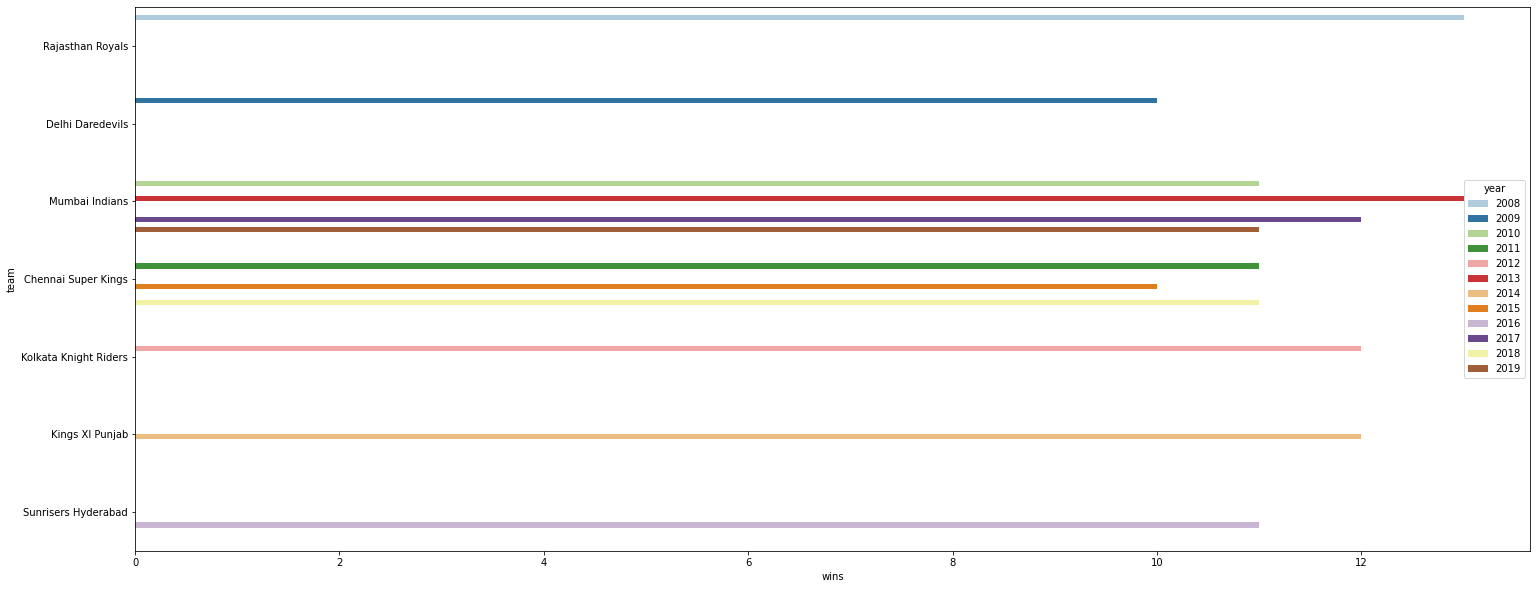

In [149]:
plt.figure(figsize=(25,10))
sns.barplot(x='wins', y='team', hue='year', data=win_per_season_df, palette='Paired');
plt.show()

**From the barplot, we can easily make inferences regarding the year in which a particular team has scored the maximum wins(and also the number of wins).**

### **We can clearly see that Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019).**

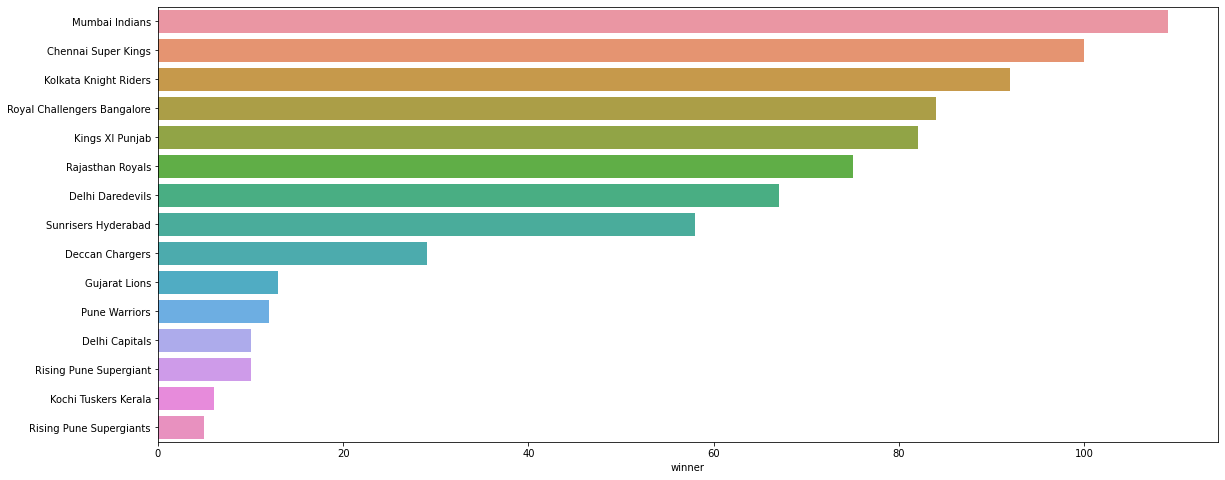

In [91]:
plt.figure(figsize=(19,8))
data = df.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.show()

In [99]:
df.iloc[df['season'].idxmax()]['venue']

'M. A. Chidambaram Stadium'

# **The venue that hosted the maximum number of matches**

In [116]:
venue_df = pd.DataFrame(columns=['Venue', 'Matches'])
for items in venue.iteritems():
    temp_df = pd.DataFrame({
        'Venue':[items[0]],
        'Matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df)

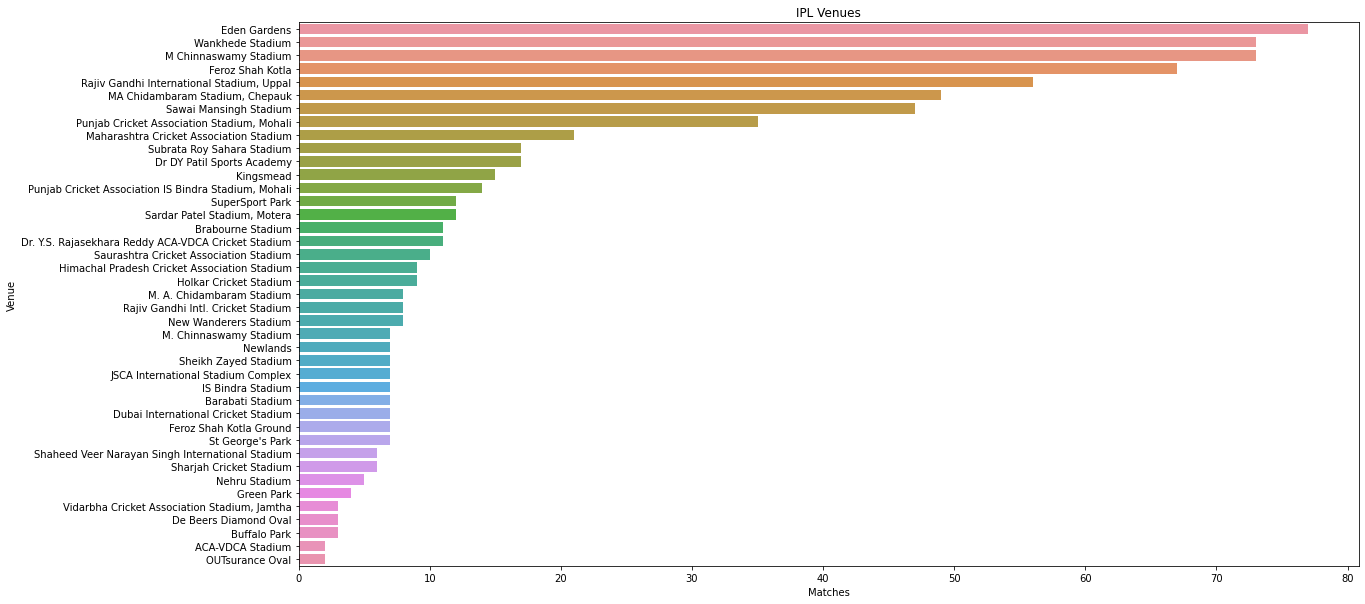

In [112]:
plt.figure(figsize=(19,10))
plt.title("IPL Venues")
sns.barplot(x='Matches', y='Venue', data=venue_df);
plt.show()

## **Observations:**

### **Eden Gardens has hosted the maximum number of IPL matches followed by Wankhede Stadium and M Chinnaswamy Stadium.**
### **Till 2019, IPL matches were hosted by 40 venues.**

# **The most successful IPL Team**
### **In a game of sports, every team competes for victory. Hence, the team that has registered the most number of victories is the most successful.**

In [115]:
team_wins_df= pd.DataFrame(columns=["Team","Wins"])
for items in team_wins.iteritems():
    temp=pd.DataFrame({'Team': [items[0]], 'Wins': [items[1]]})
    team_wins_df= team_wins_df.append(temp)

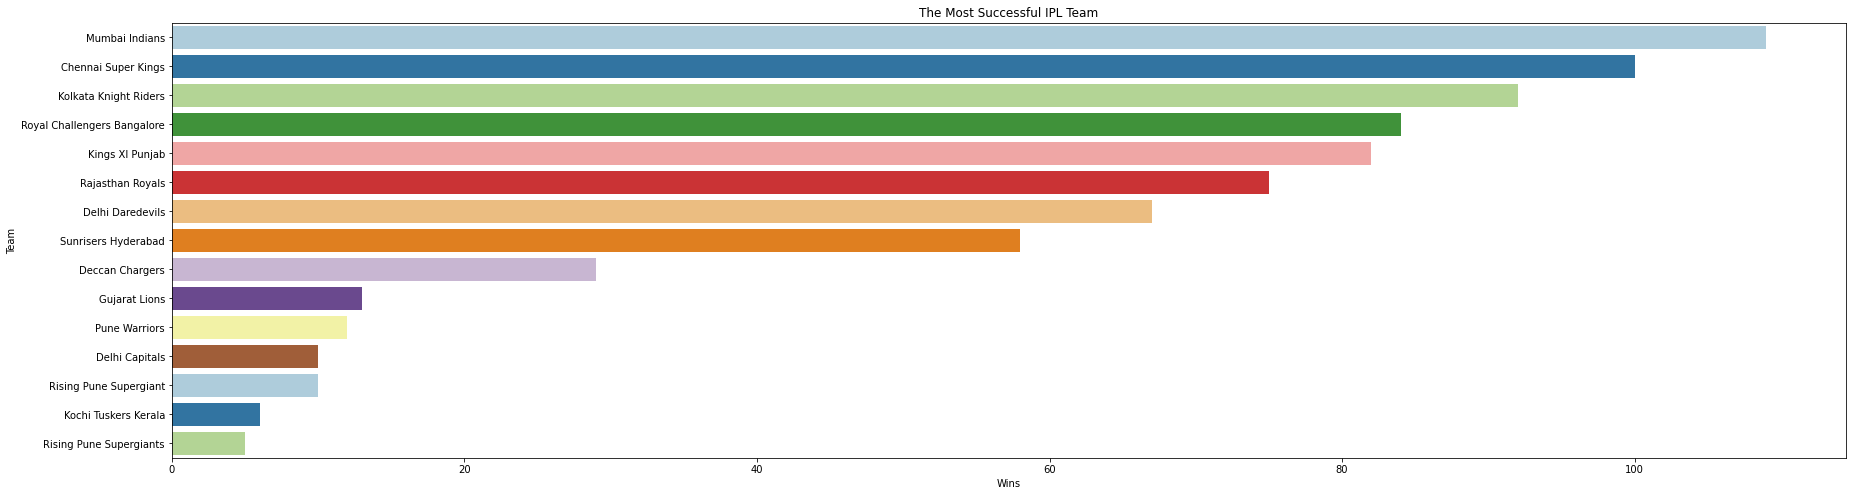

In [137]:
plt.figure(figsize=(30,8))
plt.title("The Most Successful IPL Team")
sns.barplot(x='Wins', y='Team', data=team_wins_df, palette='Paired');
plt.show()

## **Observations:**
### **Mumbai Indians is the most successful team(as they have won the maximum number of IPL matches -109) followed by Chennai Super Kings and Kolkata Knight Riders.**

# **Most Valuable Player**
### **Winning matters the most in a competitive league match. If a player makes the most significant contribution to his team’s victory, then he’s chosen as the player_of_match. The player who has won the player_of_match title on most occasions is the most valuable player.**

In [129]:
mvp_df= pd.DataFrame(columns=['Player', 'No. of Wins'])
count=0
for items in player_of_the_match.iteritems():
    if count>9:
        break
    else:
         temp_df1= pd.DataFrame({'Player': [items[0]], 'No. of Wins': [items[1]]})
         mvp_df=mvp_df.append(temp_df1)
         count+=1

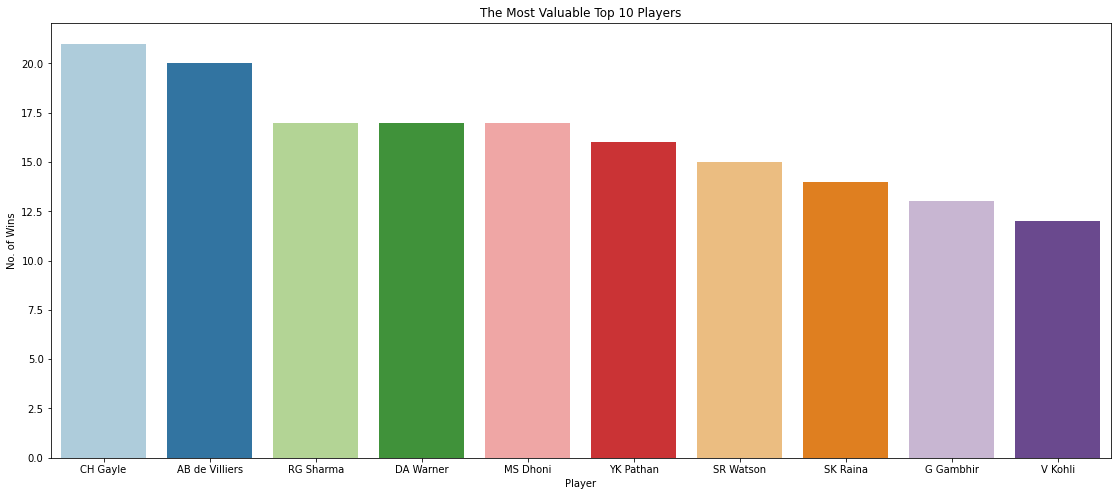

In [132]:
plt.figure(figsize=(19,8))
plt.title("The Most Valuable Top 10 Players")
sns.barplot(x='Player', y='No. of Wins', data=mvp_df, palette='Paired');
plt.show()

## **Observations:**
### **Cris Gayle is the player who won the most player of the match awards and hence is the most valuable player.**

# **The team that won the most number of Tosses**

In [133]:
toss = df['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True)

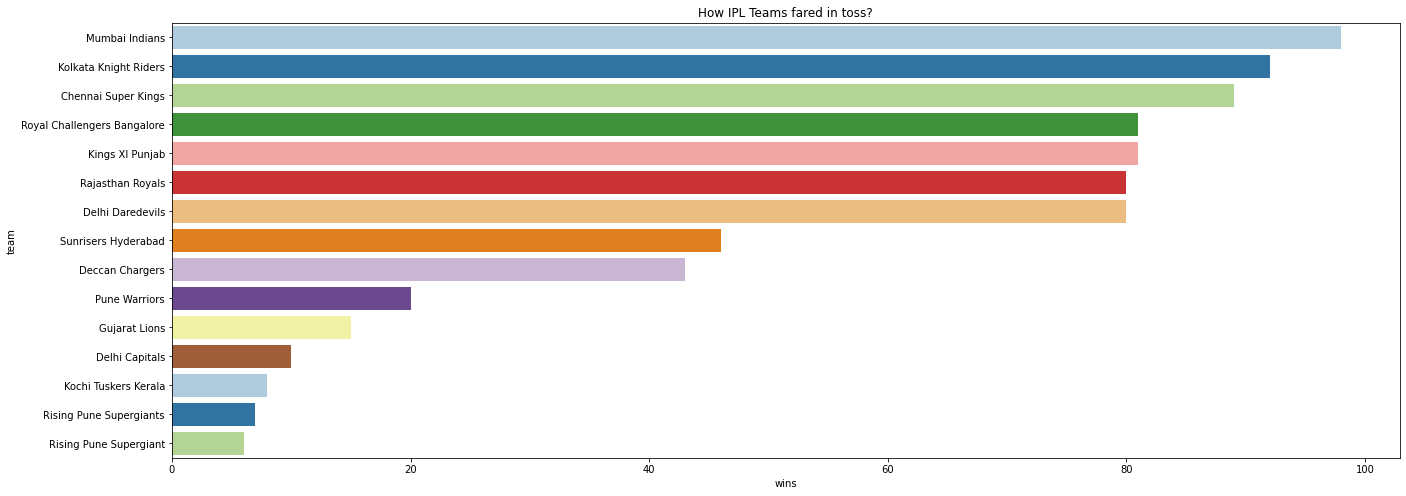

In [136]:
plt.figure(figsize=(22,8))
plt.title("How IPL Teams fared in toss?")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired');
plt.show()

## **Observations:**

### **Mumbai Indians has won the most toss(till 2019) in IPL history. All the top teams in IPL are successful in winning the toss as well.**

# **City which has hosted the maximum number of IPL matches**

In [154]:
city= df['city'].value_counts()
city_df=pd.DataFrame(columns=['City Names', 'No.Of Matches Hosted'])
for items in city.iteritems():
    temp_df=pd.DataFrame({'City Names': [items[0]], 'No. of Matches Hosted': [items[1]]})
    city_df= city_df.append(temp_df)

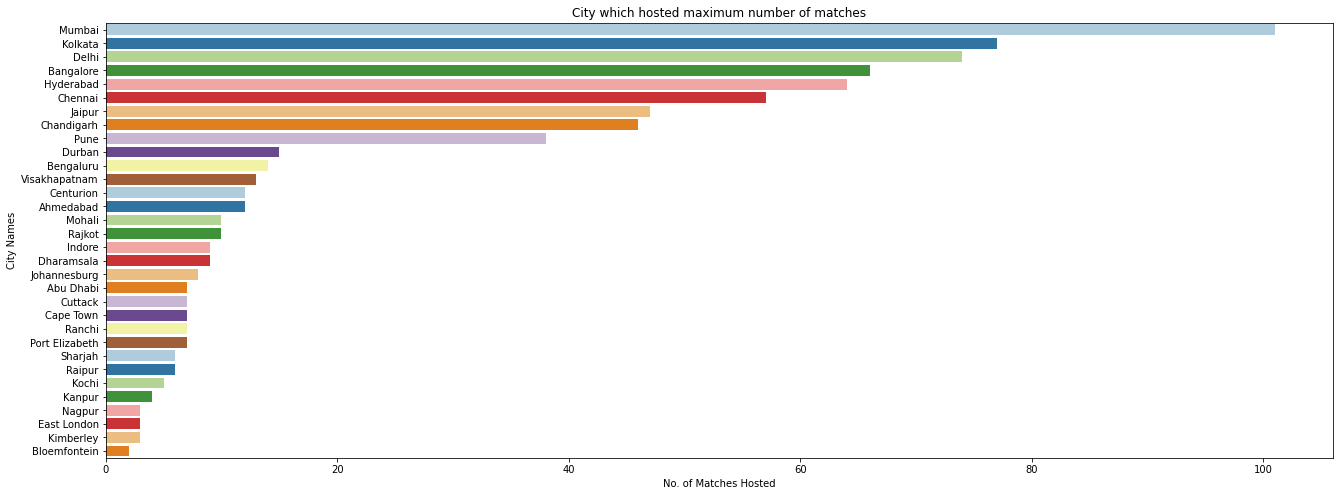

In [157]:
plt.figure(figsize=(22,8))
plt.title("City which hosted maximum number of matches")
sns.barplot(x='No. of Matches Hosted', y='City Names', data=city_df, palette='Paired');
plt.show()

## **Observation:**
### **The city of Mumbai has hosted the maximum number of IPL matches.**

# **Inferences and Conclusion**
## **Let’s summarize the important observations we made during Exploratory Data Analysis:**



*   Mumbai Indians is the most successful team in IPL.
*   Mumbai Indians has won the most number of toss.

*   There were more matches won by chasing the total(419 matches) than defending(350 matches).

*   When defending a total, the biggest victory was by 146 runs(Mumbai Indians defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi).

*   When chasing a target, the biggest victory was by 10 wickets(without losing any wickets) and there were 11 such instances.

*   The Mumbai city has hosted the most number of IPL matches.

*   Chris Gayle has won the maximum number of player of the match title.
*   Winning toss gives a slight edge(52% probability of winning) against the opponents.


*   Five Indian players have figured in the top ten IPL players list.


*   S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field.


*   Eden Gardens has hosted the maximum number of IPL matches.


*   Till 2019, 40 venues have hosted 756 IPL matches.






# **Thankyou !**